In [15]:
import numpy as np
from fun_optimization_v5 import obtimize_v5
import dill
from tqdm import tqdm

import math

## Cost Calculation Function

In [6]:
def range_with_floats(start, stop, step):
    while stop > start:
        yield start
        start += step

In [18]:
def area_cost(s1,s2,v1,v2,step_s,step_v):
    grid=[]
    print('Calculate lost of sigma[%.2f,%.2f) & volume[%.2f,%.2f)'%(s1,s2,v1,v2))
    list_s=np.arange(s1,s2,step_s)
    list_v=np.arange (v1,v2,step_v)
    for i in tqdm(list_s):
        for j in list_v:
            lost=obtimize_v5(sv=np.asarray((i,j)),output=0,append=0)
            grid.append(np.asarray((i,j,lost)))
    return grid

        

In [ ]:
def divide_vs(s1,s2,v1,v2,step_s,step_v):
    tno_s=(s2-s1)/step_s
    tno_v=(v2-v1)/step_v

    if tno_s <= 6:
        if tno_v <= 6:
            grid=area_cost(s1,s2,v1,v2,step_s,step_v)
        else:
            div_n0=math.ceil(tno_v/6)
            for n in range (div_n0):
                grid%.2f


    
            


In [19]:
grid1=area_cost(v1=13,v2=15,step_v=0.2,s1=60,s2=70,step_s=0.5)
grid2=area_cost(v1=13,v2=15,step_v=0.2,s1=70,s2=80,step_s=0.5)
grid3=area_cost(v1=15,v2=17,step_v=0.2,s1=60,s2=70,step_s=0.5)
grid4=area_cost(v1=15,v2=17,step_v=0.2,s1=70,s2=80,step_s=0.5)

Calculate lost of sigma[60.00,70.00) & volume[13.00,15.00)


100%|██████████| 20/20 [09:21<00:00, 28.07s/it]


Calculate lost of sigma[70.00,80.00) & volume[13.00,15.00)


100%|██████████| 20/20 [10:26<00:00, 31.31s/it]


Calculate lost of sigma[60.00,70.00) & volume[15.00,17.00)


100%|██████████| 20/20 [10:03<00:00, 30.17s/it]


Calculate lost of sigma[70.00,80.00) & volume[15.00,17.00)


100%|██████████| 20/20 [08:50<00:00, 26.55s/it]


In [30]:
grid_1arr=np.asarray(grid1)
grid_1matrix=np.reshape(grid_1arr[:,3-1],(20,10))
grid_2arr=np.asarray(grid2)
grid_2matrix=np.reshape(grid_2arr[:,3-1],(20,10))
grid_3arr=np.asarray(grid3)
grid_3matrix=np.reshape(grid_3arr[:,3-1],(20,10))
grid_4arr=np.asarray(grid4)
grid_4matrix=np.reshape(grid_4arr[:,3-1],(20,10))

In [37]:
grid_all=np.hstack(( np.vstack((grid_1matrix,grid_2matrix)),np.vstack((grid_3matrix,grid_4matrix)) ))
sigma=np.arange(60,80,0.5)
volume=np.arange (13,17,0.2)

## Plot The Contour Map

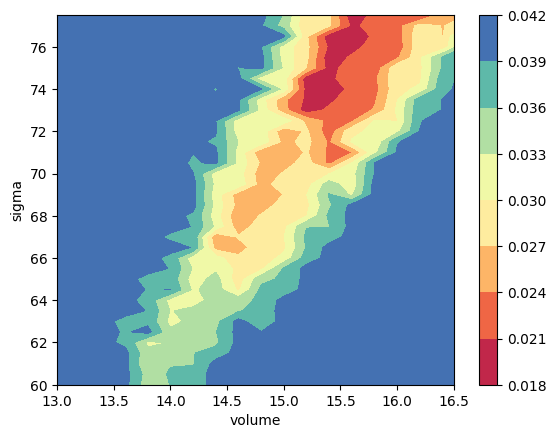

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
#进行绘图

grid_part=grid_all+0
grid_part[grid_part > 0.04] = 0.04
fig, ax = plt.subplots()
cs = ax.contourf(volume, sigma, grid_part, cmap=plt.get_cmap('Spectral'))
#im = ax.scatter(y,x,marker='.')


#n=np.arange(y.shape[0])
#for i,txt in enumerate(n):
#    ax.annotate(txt,(y[i],x[i]))
##添加colorbar
cbar = fig.colorbar(cs)

plt.xlabel('volume')
plt.ylabel('sigma')

plt.xlim((13,16.5))
plt.ylim((60,77.5))

plt.show()

In [ ]:
#save the cost map
dill.dump_session( './GlobalGrid_s60-80-0.5_v13-17-0.2.pkl')